# **Data Preperation**

In [28]:
import os
import pandas as pd

In [29]:
df = pd.read_csv('all.csv')
df

,Date,Expiry Date,Open,Close,High,Low
0,2016-02-05,05FEB2016,25403.0,27253.0,28113.0,25403.0
1,2016-03-04,04MAR2016,27416.0,29076.0,30000.0,27416.0
2,2016-04-05,05APR2016,29770.0,28290.0,30147.0,27955.0
3,2016-05-05,05MAY2016,28671.0,30020.0,30342.0,28510.0
4,2016-06-03,03JUN2016,29893.0,28679.0,30400.0,28400.0
...,...,...,...,...,...,...
74,2022-04-05,05APR2022,52513.0,51342.0,55428.0,50340.0
75,2022-05-05,05MAY2022,51239.0,51155.0,53478.0,50575.0
76,2022-06-03,03JUN2022,50958.0,50885.0,52030.0,49660.0
77,2022-07-05,05JUL2022,50959.0,51610.0,53675.0,50200.0


In [30]:
df['P&L'] = df['Open'] - df['Close']
df

,Date,Expiry Date,Open,Close,High,Low,P&L
0,2016-02-05,05FEB2016,25403.0,27253.0,28113.0,25403.0,-1850.0
1,2016-03-04,04MAR2016,27416.0,29076.0,30000.0,27416.0,-1660.0
2,2016-04-05,05APR2016,29770.0,28290.0,30147.0,27955.0,1480.0
3,2016-05-05,05MAY2016,28671.0,30020.0,30342.0,28510.0,-1349.0
4,2016-06-03,03JUN2016,29893.0,28679.0,30400.0,28400.0,1214.0
...,...,...,...,...,...,...,...
74,2022-04-05,05APR2022,52513.0,51342.0,55428.0,50340.0,1171.0
75,2022-05-05,05MAY2022,51239.0,51155.0,53478.0,50575.0,84.0
76,2022-06-03,03JUN2022,50958.0,50885.0,52030.0,49660.0,73.0
77,2022-07-05,05JUL2022,50959.0,51610.0,53675.0,50200.0,-651.0


In [31]:
diff = []
for index, row in df.iterrows():
  if index+1 > len(df)-1:
    diff.append(0)
    break
  diff.append(df.at[index+1,'Open']-row["Close"])

df['Points Difference'] = diff
df

,Date,Expiry Date,Open,Close,High,Low,P&L,Points Difference
0,2016-02-05,05FEB2016,25403.0,27253.0,28113.0,25403.0,-1850.0,163.0
1,2016-03-04,04MAR2016,27416.0,29076.0,30000.0,27416.0,-1660.0,694.0
2,2016-04-05,05APR2016,29770.0,28290.0,30147.0,27955.0,1480.0,381.0
3,2016-05-05,05MAY2016,28671.0,30020.0,30342.0,28510.0,-1349.0,-127.0
4,2016-06-03,03JUN2016,29893.0,28679.0,30400.0,28400.0,1214.0,589.0
...,...,...,...,...,...,...,...,...
74,2022-04-05,05APR2022,52513.0,51342.0,55428.0,50340.0,1171.0,-103.0
75,2022-05-05,05MAY2022,51239.0,51155.0,53478.0,50575.0,84.0,-197.0
76,2022-06-03,03JUN2022,50958.0,50885.0,52030.0,49660.0,73.0,74.0
77,2022-07-05,05JUL2022,50959.0,51610.0,53675.0,50200.0,-651.0,-247.0


# **Data Plots**

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'figure.autolayout': True})

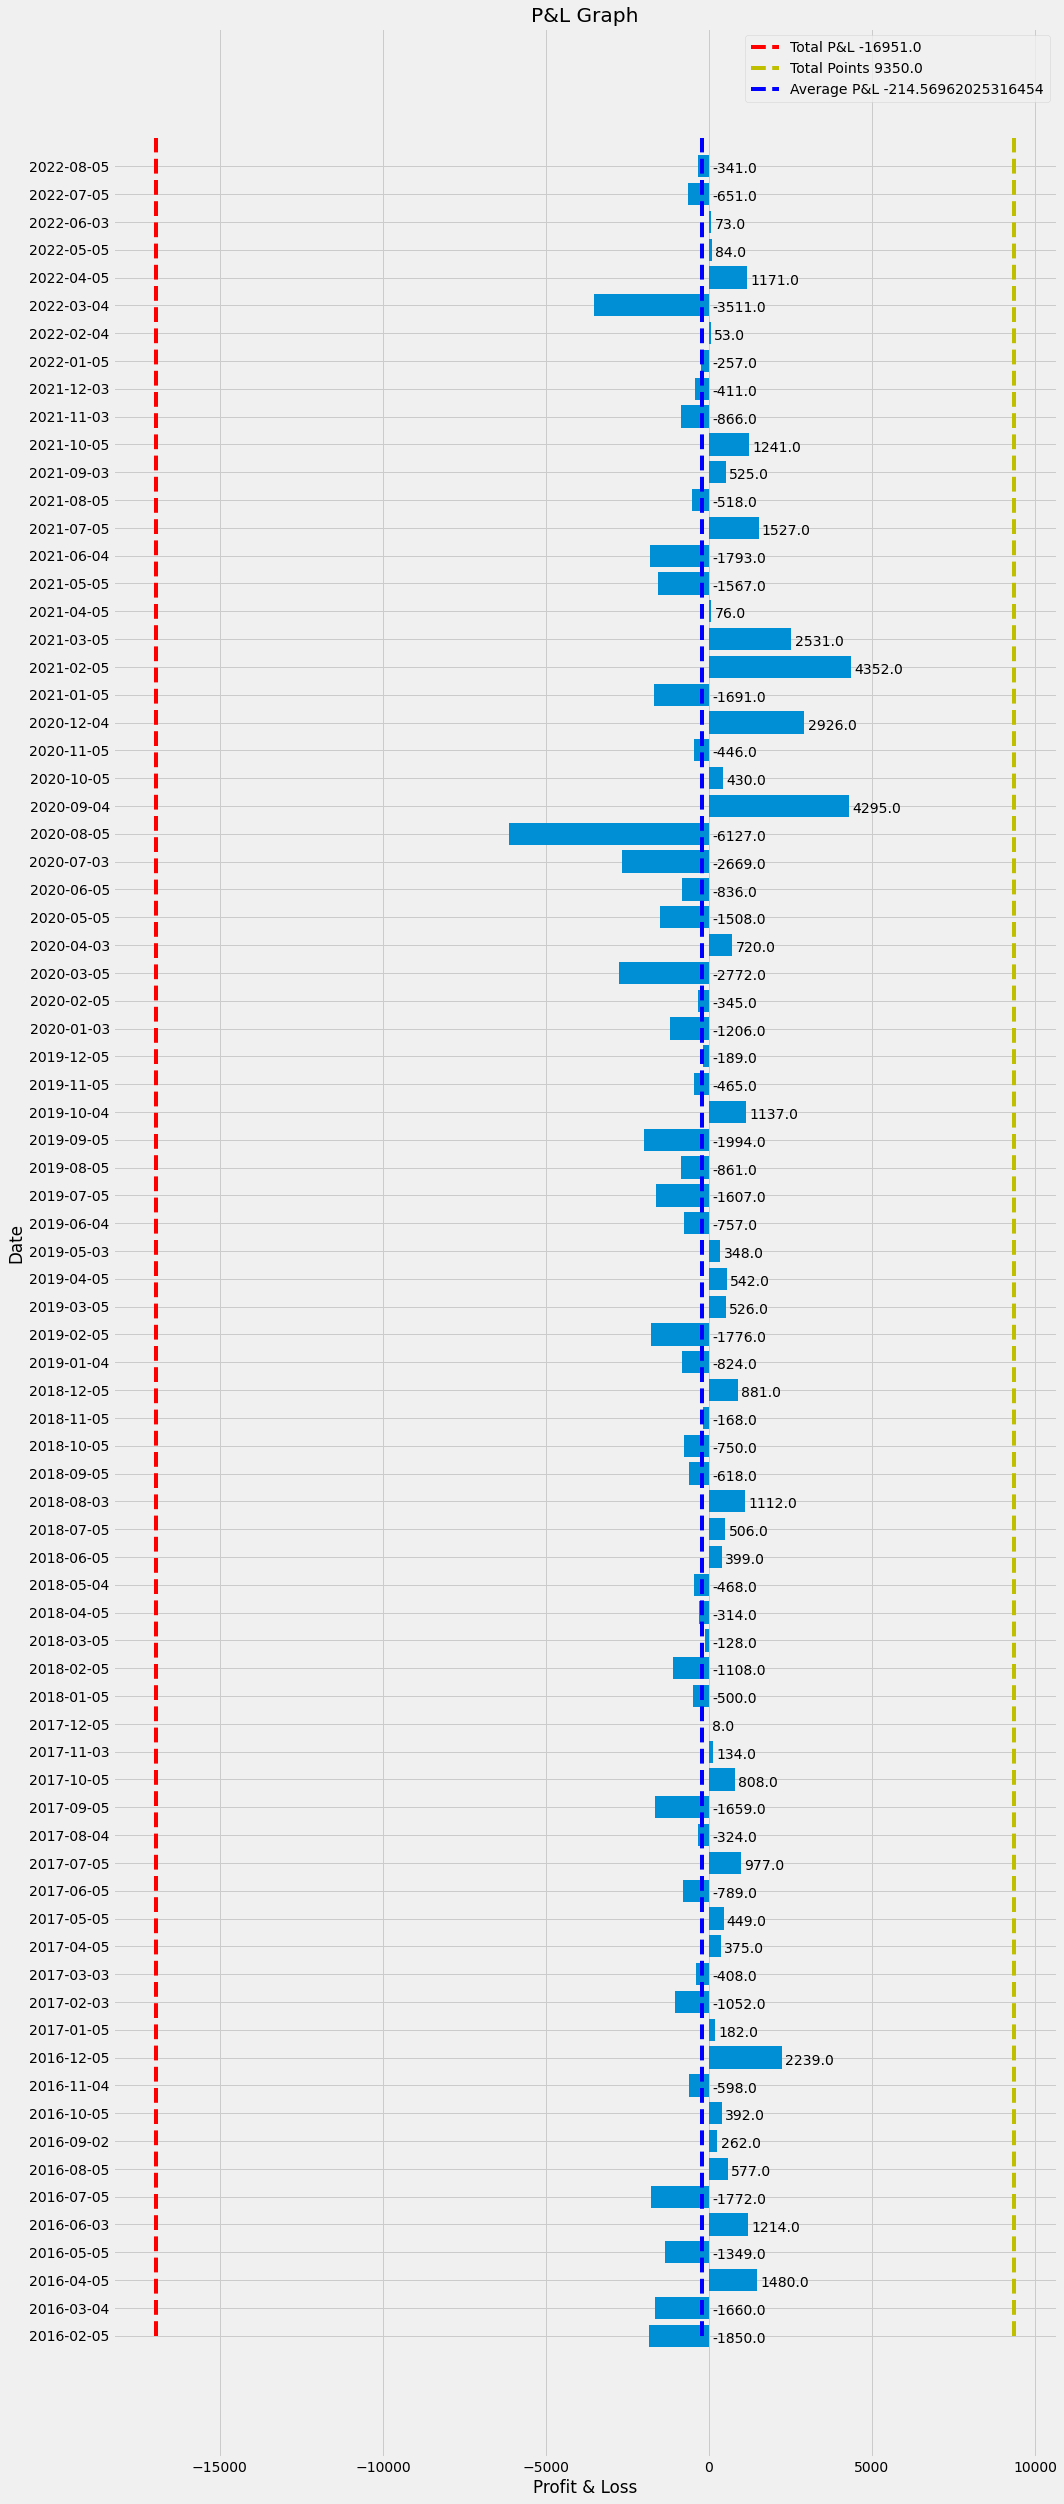

In [45]:
fig, ax = plt.subplots(figsize=(15,35))
# data plot
ax.barh(df['Date'], df['P&L'])
# set labels
ax.set(xlabel='Profit & Loss', ylabel='Date', title='P&L Graph')
# useful line plots
profit_loss_total = np.sum(df['P&L'])
plt.vlines(profit_loss_total, 0, len(df), ls='--', color='r', label=f"Total P&L {profit_loss_total}")
pts_diff_total = np.sum(df['Points Difference'])
plt.vlines(pts_diff_total, 0, len(df), ls='--', color='y', label=f"Total Points {pts_diff_total}")
profit_loss_avg = np.average(df['P&L'])
plt.vlines(profit_loss_avg, 0, len(df), ls='--', color='b', label=f"Average P&L {profit_loss_avg}")
plt.legend()

# Annotate price
calc_x_pos = lambda w : w+100 if w > 0 else w-w+100
for p in ax.patches:
  # print(calc_x_pos(p.get_width()))
  ax.annotate(f'{p.get_width()}', xy=(calc_x_pos(p.get_width()), p.get_y()+0.15))
plt.show()